In [56]:
import pandas as pd

In [57]:
dados_clientes = pd.read_json('/content/drive/MyDrive/Alura/Pandas/TelecomX_Data.json')

In [58]:
dados_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [59]:
dados_clientes.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [60]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [61]:
customer_normalizado = pd.json_normalize(dados_clientes['customer'])

In [62]:
customer_normalizado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [63]:
customer_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [64]:
internet_normalizado = pd.json_normalize(dados_clientes['internet'])
phone_normalizado = pd.json_normalize(dados_clientes['phone'])
account_normalizado = pd.json_normalize(dados_clientes['account'])


In [65]:
df_final = pd.concat(
    [
        customer_normalizado,
        internet_normalizado,
        phone_normalizado,
        account_normalizado

    ],
    axis=1
)

In [66]:
df_final
df_final = df_final.merge(
    dados_clientes[['customerID', 'Churn']],
    left_index=True,
    right_index=True,
    how='left'
)

In [67]:
df_final.isna().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   InternetService   7267 non-null   object 
 6   OnlineSecurity    7267 non-null   object 
 7   OnlineBackup      7267 non-null   object 
 8   DeviceProtection  7267 non-null   object 
 9   TechSupport       7267 non-null   object 
 10  StreamingTV       7267 non-null   object 
 11  StreamingMovies   7267 non-null   object 
 12  PhoneService      7267 non-null   object 
 13  MultipleLines     7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [69]:
colunas = [
   'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'Contract', 'PaymentMethod',
    'gender', 'tenure', 'Churn'
]

In [70]:
df_final[colunas] = df_final[colunas].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-4025402415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[colunas] = df_final[colunas].replace({'Yes': 1, 'No': 0})


In [71]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
0,Female,0,1,1,9,DSL,0,1,0,1,...,0,1,0,One year,1,Mailed check,65.6,593.3,0002-ORFBO,0
1,Male,0,0,0,9,DSL,0,0,0,0,...,1,1,1,Month-to-month,0,Mailed check,59.9,542.4,0003-MKNFE,0
2,Male,0,0,0,4,Fiber optic,0,0,1,0,...,0,1,0,Month-to-month,1,Electronic check,73.9,280.85,0004-TLHLJ,1
3,Male,1,1,0,13,Fiber optic,0,1,1,0,...,1,1,0,Month-to-month,1,Electronic check,98.0,1237.85,0011-IGKFF,1
4,Female,1,1,0,3,Fiber optic,0,0,0,1,...,0,1,0,Month-to-month,1,Mailed check,83.9,267.4,0013-EXCHZ,1


In [72]:
df_final[colunas].info('SeniorCitizen')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Partner           7267 non-null   int64 
 1   Dependents        7267 non-null   int64 
 2   PhoneService      7267 non-null   int64 
 3   MultipleLines     7267 non-null   object
 4   OnlineSecurity    7267 non-null   object
 5   OnlineBackup      7267 non-null   object
 6   DeviceProtection  7267 non-null   object
 7   TechSupport       7267 non-null   object
 8   StreamingTV       7267 non-null   object
 9   StreamingMovies   7267 non-null   object
 10  PaperlessBilling  7267 non-null   int64 
 11  Contract          7267 non-null   object
 12  PaymentMethod     7267 non-null   object
 13  gender            7267 non-null   object
 14  tenure            7267 non-null   int64 
 15  Churn             7267 non-null   object
dtypes: int64(5), object(11)
memory usage: 908.5+ KB


In [73]:
df_final.groupby('Churn')[['tenure', 'Charges.Monthly']].mean()

,tenure,Charges.Monthly
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332
,31.571429,63.412277


In [74]:
df_final.groupby(['Contract', 'Churn'])[['tenure', 'Charges.Monthly']].mean()

tenure  Charges.Monthly
Contract       Churn                            
Month-to-month 0      21.033333        61.462635
               1      14.016918        73.019396
                      16.807692        64.738077
One year       0      41.674063        62.508148
               1      44.963855        85.050904
                      46.869565        71.148913
Two year       0      56.602914        60.012477
               1      61.270833        86.777083
                      56.895833        52.407292

In [75]:
df_final['Churn'].dtype

dtype('O')

In [76]:
df_final['Churn'] = pd.to_numeric(df_final['Churn'], errors='coerce')

In [77]:
df_final['Churn'].dtype

dtype('float64')

In [78]:
colunas_servicos = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

In [79]:
for col in colunas_servicos:
    print(f'\n### {col}')
    print('Base:')
    print(df_final[col].value_counts())
    print('\nTaxa de churn:')
    print(df_final.groupby(col)['Churn'].mean())


### PhoneService
Base:
PhoneService
1    6560
0     707
Name: count, dtype: int64

Taxa de churn:
PhoneService
0    0.249267
1    0.267096
Name: Churn, dtype: float64

### MultipleLines
Base:
MultipleLines
0                   3495
1                   3065
No phone service     707
Name: count, dtype: int64

Taxa de churn:
MultipleLines
0                   0.250442
1                   0.286099
No phone service    0.249267
Name: Churn, dtype: float64

### OnlineSecurity
Base:
OnlineSecurity
0                      3608
1                      2078
No internet service    1581
Name: count, dtype: int64

Taxa de churn:
OnlineSecurity
0                      0.417667
1                      0.146112
No internet service    0.074050
Name: Churn, dtype: float64

### OnlineBackup
Base:
OnlineBackup
0                      3182
1                      2504
No internet service    1581
Name: count, dtype: int64

Taxa de churn:
OnlineBackup
0                      0.399288
1                      0.215315
N

In [80]:
df_final.groupby(['PaymentMethod', 'Contract'])['Churn'].value_counts()

PaymentMethod              Contract        Churn
Bank transfer (automatic)  Month-to-month  0.0      388
                                           1.0      201
                           One year        0.0      353
                                           1.0       38
                           Two year        0.0      545
                                           1.0       19
Credit card (automatic)    Month-to-month  0.0      365
                                           1.0      178
                           One year        0.0      357
                                           1.0       41
                           Two year        0.0      568
                                           1.0       13
Electronic check           Month-to-month  1.0      994
                                           0.0      856
                           One year        0.0      283
                                           1.0       64
                           Two year        0.0      155
                                           1.0       13
Mailed check               Month-to-month  0.0      611
                                           1.0      282
                           One year        0.0      314
                                           1.0       23
                           Two year        0.0      379
                                           1.0        3
Name: count, dtype: int64

In [81]:
df_final.groupby(['PaymentMethod', 'Contract'])['Churn'].mean()

PaymentMethod              Contract      
Bank transfer (automatic)  Month-to-month    0.341256
                           One year          0.097187
                           Two year          0.033688
Credit card (automatic)    Month-to-month    0.327808
                           One year          0.103015
                           Two year          0.022375
Electronic check           Month-to-month    0.537297
                           One year          0.184438
                           Two year          0.077381
Mailed check               Month-to-month    0.315789
                           One year          0.068249
                           Two year          0.007853
Name: Churn, dtype: float64

In [82]:
df_final.groupby(['PaymentMethod', 'Contract'])['Churn'].value_counts()

PaymentMethod              Contract        Churn
Bank transfer (automatic)  Month-to-month  0.0      388
                                           1.0      201
                           One year        0.0      353
                                           1.0       38
                           Two year        0.0      545
                                           1.0       19
Credit card (automatic)    Month-to-month  0.0      365
                                           1.0      178
                           One year        0.0      357
                                           1.0       41
                           Two year        0.0      568
                                           1.0       13
Electronic check           Month-to-month  1.0      994
                                           0.0      856
                           One year        0.0      283
                                           1.0       64
                           Two year        0.0      155
                                           1.0       13
Mailed check               Month-to-month  0.0      611
                                           1.0      282
                           One year        0.0      314
                                           1.0       23
                           Two year        0.0      379
                                           1.0        3
Name: count, dtype: int64

In [83]:
filtro = (df_final['PaymentMethod'] == 'Electronic check') & (df_final['Contract'] == 'Month-to-month')

In [84]:
df_final.loc[filtro, ['tenure', 'Charges.Monthly']].mean()

,0
tenure,18.022977
Charges.Monthly,75.095796


In [85]:
filtro = (df_final['Contract'] == 'Month-to-month') & \
         (df_final['PaymentMethod'] == 'Bank transfer (automatic)')

In [86]:
df_final.loc[filtro, ['tenure', 'Charges.Monthly']].mean()

,0
tenure,24.689145
Charges.Monthly,68.773026


In [87]:
df_final['Contas Diarias'] = df_final['Charges.Monthly'] / 30

In [88]:
df_final[['Contas Diarias', 'Charges.Monthly']].head()

,Contas Diarias,Charges.Monthly
0,2.186667,65.6
1,1.996667,59.9
2,2.463333,73.9
3,3.266667,98.0
4,2.796667,83.9


In [89]:
df_final.groupby('Churn')[['Contas Diarias']].mean()

,Contas Diarias
Churn,
0.0,2.042171
1.0,2.481378


In [90]:
df_final.groupby(['Contract', 'Churn'])[['Contas Diarias']].mean()

Contas Diarias
Contract       Churn                
Month-to-month 0.0          2.048755
               1.0          2.433980
One year       0.0          2.083605
               1.0          2.835030
Two year       0.0          2.000416
               1.0          2.892569

In [91]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'],
                                          errors='coerce')
df_final['Charges.Total'].dtype

dtype('float64')

In [92]:
df_final.groupby('Churn')[['Charges.Total']].mean()

,Charges.Total
Churn,
0.0,2555.344141
1.0,1531.796094


In [93]:
df_final.groupby(['Contract', 'Churn'])[['Charges.Total']].mean()

Charges.Total
Contract       Churn               
Month-to-month 0.0      1521.927590
               1.0      1164.460574
One year       0.0      2903.569908
               1.0      4066.212048
Two year       0.0      3678.986103
               1.0      5432.363542

In [94]:
import matplotlib.pyplot as plt


In [95]:
churn_counts = df_final['Churn'].value_counts()

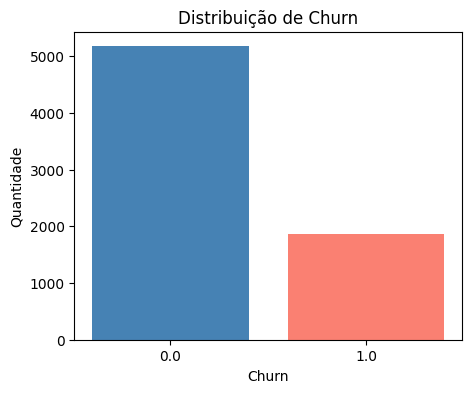

In [96]:
plt.figure(figsize=(5, 4))
plt.bar(churn_counts.index.astype(str), churn_counts.values, color=['steelblue', 'salmon'])
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.title('Distribuição de Churn')
plt.show()
# Observação: cerca de 30% dos clientes cancelam o serviço, enquanto 70% permanecem ativos

In [97]:
churn_rate = churn_counts[1] / churn_counts.sum()


In [98]:
churn_percent = churn_counts / churn_counts.sum() * 100

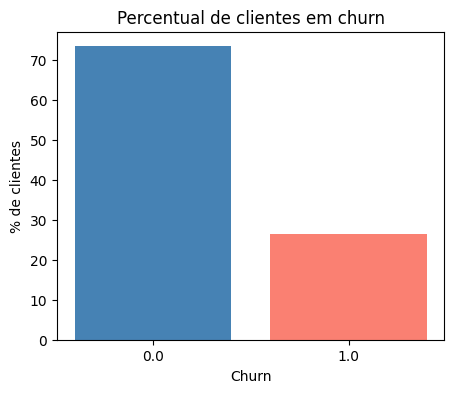

In [99]:
plt.figure(figsize=(5,4))
plt.bar(churn_percent.index.astype(str), churn_percent.values, color=['steelblue','salmon'])
plt.xlabel('Churn')
plt.ylabel('% de clientes')
plt.title('Percentual de clientes em churn')
plt.show()


In [100]:
# Observação: clientes com contrato Month-to-month apresentam a maior taxa de churn, bem acima dos contratos de 1 e 2 anos

In [101]:
churn_contract = (
    df_final.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .unstack()
)

In [102]:
churn_percent_contract = (
    df_final.groupby('Contract')['Churn']
           .mean() * 100
)

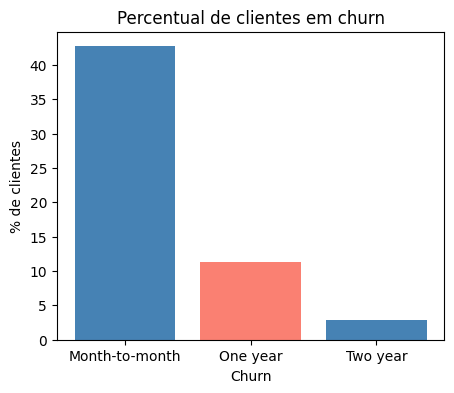

In [103]:
plt.figure(figsize=(5,4))
plt.bar(churn_percent_contract.index.astype(str), churn_percent_contract.values, color=['steelblue','salmon'])
plt.xlabel('Churn')
plt.ylabel('% de clientes')
plt.title('Percentual de clientes em churn')
plt.show()

In [104]:
# Observação: clientes com contrato Month-to-month apresentam a maior taxa de churn,
# bem acima dos contratos de 1 e 2 anos

In [105]:
churn_percent_payment = (
    df_final.groupby('PaymentMethod')['Churn']
           .mean() * 100
)

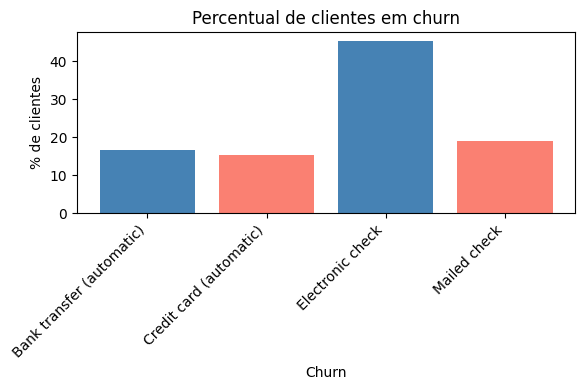

In [106]:
plt.figure(figsize=(6,4))
plt.bar(churn_percent_payment.index.astype(str), churn_percent_payment.values, color=['steelblue','salmon'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Churn')
plt.ylabel('% de clientes')
plt.title('Percentual de clientes em churn')
plt.tight_layout()
plt.show()


In [107]:
#Observação: o método Electronic check concentra o maior percentual de churn, enquanto pagamentos automáticos apresentam menores taxas de cancelamento

In [108]:
churn_percent_internet = (
    df_final.groupby('InternetService')['Churn']
           .mean() * 100
)

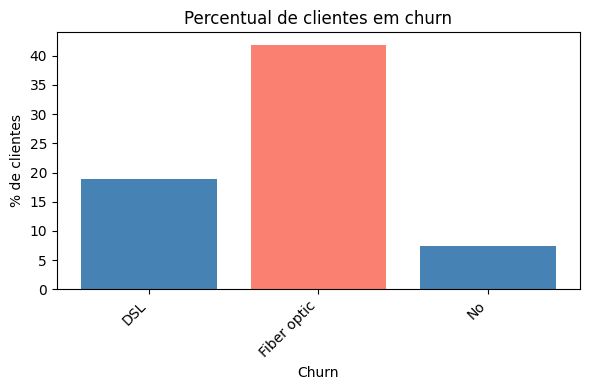

In [109]:
plt.figure(figsize=(6,4))
plt.bar(churn_percent_internet.index.astype(str), churn_percent_internet.values, color=['steelblue','salmon'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Churn')
plt.ylabel('% de clientes')
plt.title('Percentual de clientes em churn')
plt.tight_layout()
plt.show()

In [110]:
#Observação: clientes com internet Fiber optic exibem a maior taxa de churn, acima de usuários DSL e de clientes sem serviço de internet